<a href="https://colab.research.google.com/github/malick08012/Houses_Price_Prediction_Through_Regression/blob/main/Houses_Price_Prediction_Through_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Uploading Data Set

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 4) house Prediction Data Set.csv to 4) house Prediction Data Set.csv


Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Load the Dataset

In [12]:
# Load dataset
df = pd.read_csv('/content/4) house Prediction Data Set.csv', sep='\s+', header=None)

# Set column names
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
              'PTRATIO', 'B', 'LSTAT', 'MEDV']


df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Check for Missing Values

In [5]:
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Define Features and Target

In [6]:
X = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']               # Target


Split Dataset into Training and Testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Train and Evaluate Models

Linear Regression

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression -> MSE: 24.29, R²: 0.67


Decision Tree Regressor

In [9]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor -> MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")


Decision Tree Regressor -> MSE: 10.42, R²: 0.86


Random Forest Regressor



In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor -> MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest Regressor -> MSE: 7.90, R²: 0.89


Compare All Models

In [13]:
print("\n Model Performance Comparison:")
print(f"Linear Regression      - R²: {r2_lr:.2f}, MSE: {mse_lr:.2f}")
print(f"Decision Tree Regressor- R²: {r2_dt:.2f}, MSE: {mse_dt:.2f}")
print(f"Random Forest Regressor- R²: {r2_rf:.2f}, MSE: {mse_rf:.2f}")



 Model Performance Comparison:
Linear Regression      - R²: 0.67, MSE: 24.29
Decision Tree Regressor- R²: 0.86, MSE: 10.42
Random Forest Regressor- R²: 0.89, MSE: 7.90


Summary:

Based on R² and MSE scores, the model with the highest R² and lowest MSE is the most accurate.
Usually, Random Forest performs best due to ensemble learning and reduced overfitting.

Use Random Forest Regressor for predicting house prices as it offers a balance of accuracy.

No Need Of Visualization In This Project But For Better Insights

Visualization Of Random Forest Regressor

Actual VS Predicted Values Plot

First define, train, and evaluate the Random Forest model before using it for predictions or visualization.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R² Score:", r2_rf)
print("Random Forest MSE:", mse_rf)


Random Forest R² Score: 0.8922527442109116
Random Forest MSE: 7.901513892156864


Actual VS Predicted Values Plot

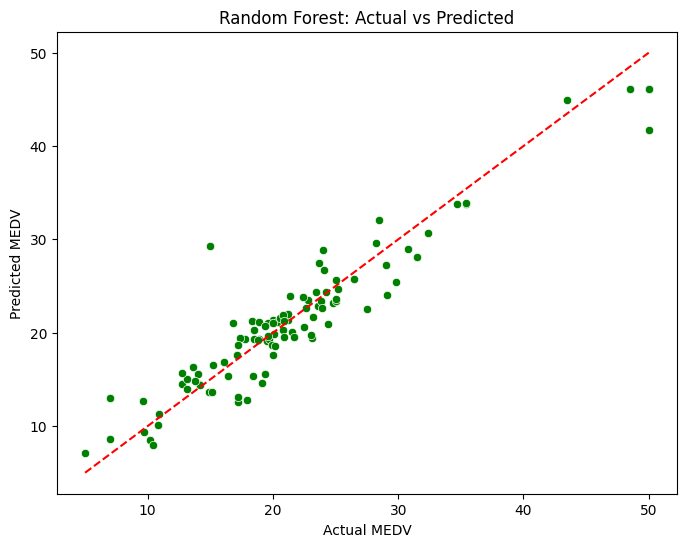

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


 Feature Importance Plot (Random Forest)

<ipython-input-18-4b05d42cfcab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


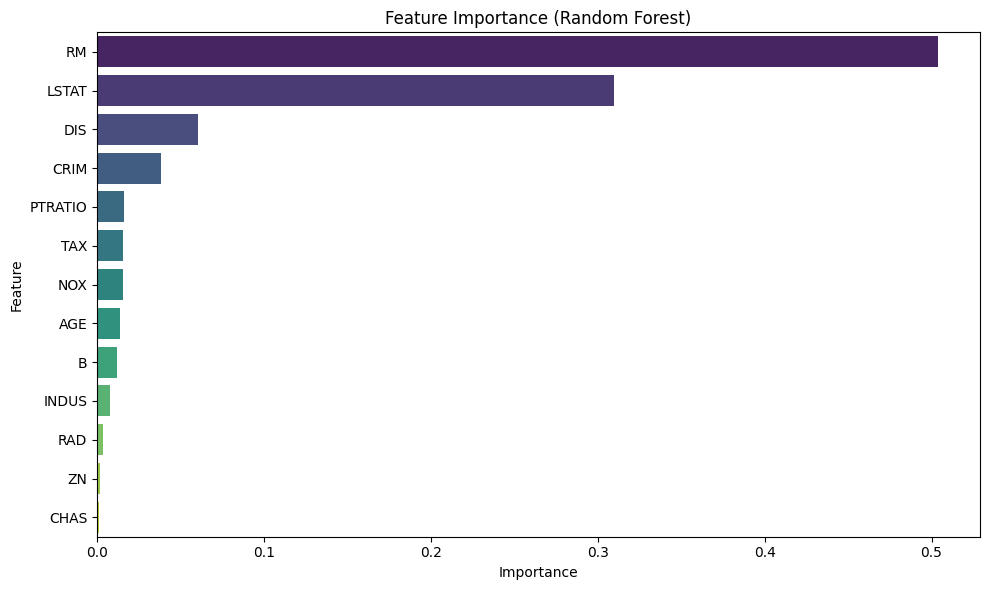

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


Compare Model Performance (Bar Plot)

<ipython-input-20-9be187a603ff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=performance_df, palette='Set2')


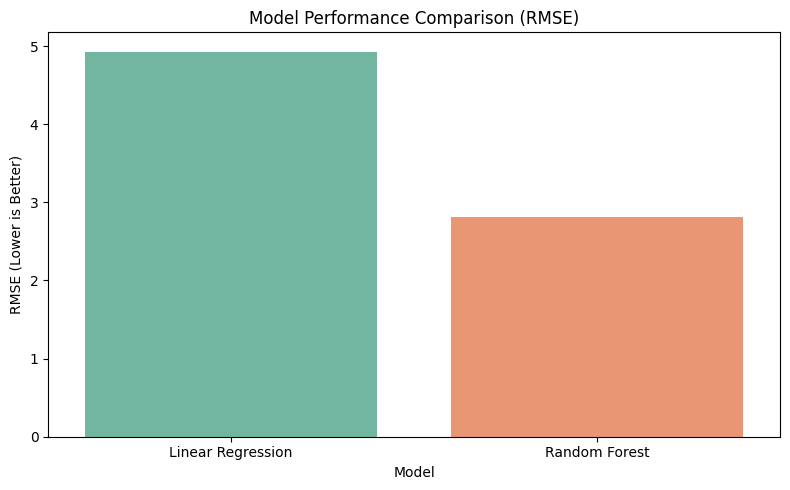

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE manually
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Linear Regression
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Random Forest

# Prepare data for bar plot
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf]
})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=performance_df, palette='Set2')
plt.title('Model Performance Comparison (RMSE)')
plt.ylabel('RMSE (Lower is Better)')
plt.tight_layout()
plt.show()
